<a href="https://colab.research.google.com/github/anamacam/machine_learning/blob/master/bionergia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
from google.colab import drive
drive.mount('/content/drive')

# Update datos with full paths to files
# The issue is likely with the file paths. Ensure they are correct and consider replacing special characters.
datos = [
    '/content/drive/MyDrive/IA-Rendimiento Agrícola /Data/bioenergia/biomasa.xlsm',
    '/content/drive/MyDrive/IA-Rendimiento Agrícola /Data/bioenergia/eolica.xlsm',
    '/content/drive/MyDrive/IA-Rendimiento Agrícola /Data/bioenergia/fosiles.xlsm'
]  # Replace with your actual paths if needed

dfs = [pd.read_excel(file) for file in datos]  # Read each file into a DataFrame
print(dfs)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[                       Planta Tipo Despacho  Generación [GWh]      Part.[%]
0                   INCAUCA 1            ND        222.858337  2.035692e-03
1                  MAYAGUEZ 1            ND        173.768706  1.587284e-03
2         INGENIO PROVIDENCIA            ND        139.906400  1.277970e-03
3         INGENIO RISARALDA 1            ND        124.704015  1.139105e-03
4         COGENERADOR PROENCA            ND         92.412508  8.441389e-04
5                   BIOENERGY            ND         91.896796  8.394282e-04
6          INGENIO RIOPAILA 1            ND         90.787582  8.292961e-04
7       COGENERADOR PROENCA 1            ND         58.470264  5.340946e-04
8     COGENERADOR MANUELITA 2            ND         58.154368  5.312091e-04
9     AUTOG INGENIO CARMELITA            ND         29.763310  2.718719e-04
10       INGENIO SAN CARLOS 1     

In [25]:
# Revisar las primeras filas de cada DataFrame

for i, df in enumerate(dfs):
  print(f"First 5 rows of DataFrame {i+1}:")
  print(df.head())
  print("\n")


First 5 rows of DataFrame 1:
                Planta Tipo Despacho  Generación [GWh]  Part.[%]
0            INCAUCA 1            ND        222.858337  0.002036
1           MAYAGUEZ 1            ND        173.768706  0.001587
2  INGENIO PROVIDENCIA            ND        139.906400  0.001278
3  INGENIO RISARALDA 1            ND        124.704015  0.001139
4  COGENERADOR PROENCA            ND         92.412508  0.000844


First 5 rows of DataFrame 2:
                    Planta Tipo Despacho  Generación [GWh]  Part.[%]
0  PARQUE EOLICO GUAJIRA I            ND        132.982651  0.001215
1     PARQUE EÓLICO WESP01            ND         86.699218  0.000792
2         JEPIRACHI 1 - 15            ND         37.851637  0.000346


First 5 rows of DataFrame 3:
        Planta Tipo Despacho  Generación [GWh]  Part.[%]
0    TEBSAB CC            DC       4547.976903  0.041543
1   GECELCA 32            DC       1899.189950  0.017348
2  FLORES 4 CC            DC       1684.733754  0.015389
3      PAIPA 4 

In [26]:
# Verificar valores nulos y duplicados

for i, df in enumerate(dfs):
  print(f"DataFrame {i+1}:")
  print("Null values:")
  print(df.isnull().sum())
  print("\nDuplicate rows:")
  print(df[df.duplicated()])
  print("\n")


DataFrame 1:
Null values:
Planta              0
Tipo Despacho       0
Generación [GWh]    0
Part.[%]            0
dtype: int64

Duplicate rows:
Empty DataFrame
Columns: [Planta, Tipo Despacho, Generación [GWh], Part.[%]]
Index: []


DataFrame 2:
Null values:
Planta              0
Tipo Despacho       0
Generación [GWh]    0
Part.[%]            0
dtype: int64

Duplicate rows:
Empty DataFrame
Columns: [Planta, Tipo Despacho, Generación [GWh], Part.[%]]
Index: []


DataFrame 3:
Null values:
Planta              0
Tipo Despacho       0
Generación [GWh]    0
Part.[%]            0
dtype: int64

Duplicate rows:
Empty DataFrame
Columns: [Planta, Tipo Despacho, Generación [GWh], Part.[%]]
Index: []




In [27]:
# Obtener estadísticas descriptivas de las columnas numéricas

for i, df in enumerate(dfs):
  print(f"Descriptive statistics for numerical columns in DataFrame {i+1}:")
  print(df.describe(include=['number']))  # Only include numerical columns
  print("\n")


Descriptive statistics for numerical columns in DataFrame 1:
       Generación [GWh]      Part.[%]
count         21.000000  2.100000e+01
mean          53.771374  4.911728e-04
std           66.182719  6.045438e-04
min            0.009519  8.695098e-08
25%            2.629693  2.402084e-05
50%           12.759675  1.165528e-04
75%           91.896796  8.394282e-04
max          222.858337  2.035692e-03


Descriptive statistics for numerical columns in DataFrame 2:
       Generación [GWh]  Part.[%]
count          3.000000  3.000000
mean          85.844502  0.000784
std           47.571266  0.000435
min           37.851637  0.000346
25%           62.275428  0.000569
50%           86.699218  0.000792
75%          109.840935  0.001003
max          132.982651  0.001215


Descriptive statistics for numerical columns in DataFrame 3:
       Generación [GWh]   Part.[%]
count         66.000000  66.000000
mean         369.340318   0.003374
std          674.649329   0.006163
min            0.000000  

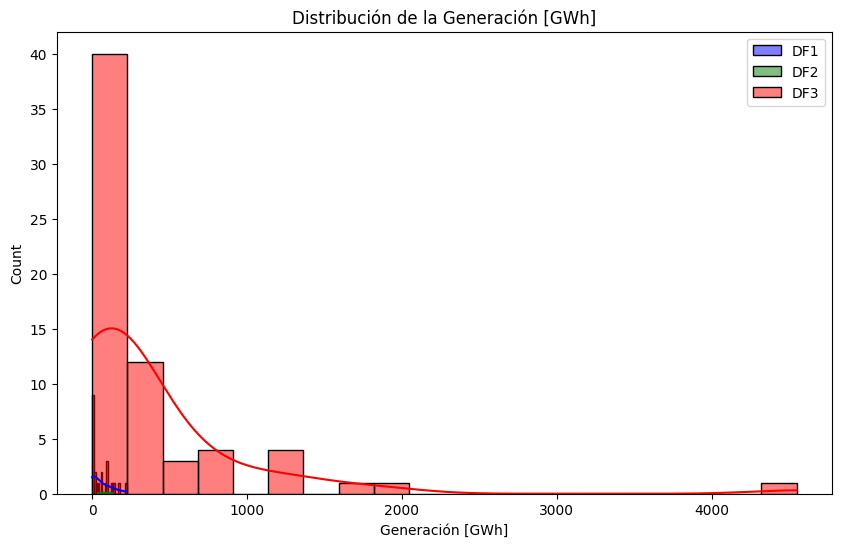

In [32]:
# Distribución de la columna 'Generación [GWh]' para cada DataFrame


plt.figure(figsize=(10,6))

try:
    df1, df2, df3 = dfs
except ValueError:
    print("Error: Make sure 'dfs' contains at least 3 DataFrames to unpack into df1, df2, df3.")


# Distribución de la columna 'Generación [GWh]' para cada DataFrame
sns.histplot(df1['Generación [GWh]'], bins=20, kde=True, color='blue', label='DF1')
sns.histplot(df2['Generación [GWh]'], bins=20, kde=True, color='green', label='DF2')
sns.histplot(df3['Generación [GWh]'], bins=20, kde=True, color='red', label='DF3')

plt.title('Distribución de la Generación [GWh]')
plt.legend()
plt.show()

  Plant Type  Percentage Share
0    Biomass          4.382993
1       Wind          0.999618
2     Fossil         94.617389


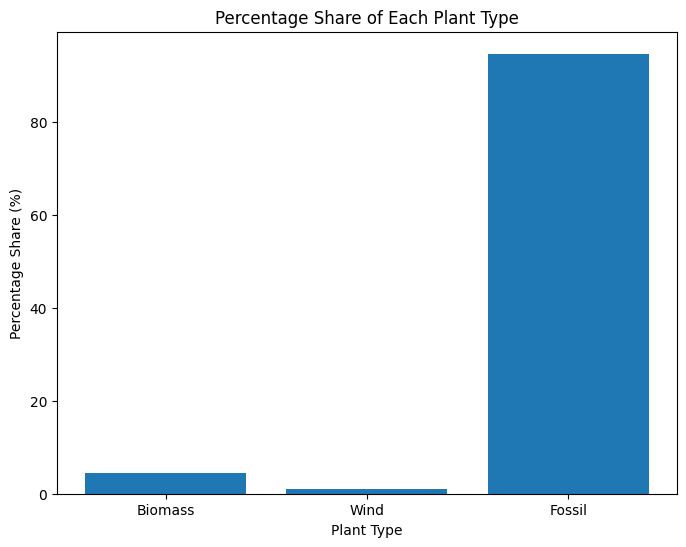

In [34]:
# Comparar la participación porcentual de cada planta

total_generation = []
for df in dfs:
  total_generation.append(df['Generación [GWh]'].sum())


percentage_shares = []
for i, df in enumerate(dfs):
  plant_share = (df['Generación [GWh]'].sum() / sum(total_generation)) * 100
  percentage_shares.append(plant_share)

plant_types = ['Biomass', 'Wind', 'Fossil']
comparison_df = pd.DataFrame({'Plant Type': plant_types, 'Percentage Share': percentage_shares})


print(comparison_df)


plt.figure(figsize=(8, 6))
plt.bar(comparison_df['Plant Type'], comparison_df['Percentage Share'])
plt.title('Percentage Share of Each Plant Type')
plt.xlabel('Plant Type')
plt.ylabel('Percentage Share (%)')
plt.show()

